#### Hey!!! In this tutorial we make the prediction on california House Price using ANN.
#### Step 0:
*          Import all necessary libraries which we want to use

In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.DataFrame(housing.target, columns=["target"])

In [2]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


* Now We want to divide our train ,test set after that we divide it into validation set also .

In [4]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

##### Standarize the all training and validation set 

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [7]:
import numpy as np

In [13]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_valid = np.asarray(X_valid)
y_valid = np.asarray(y_valid)
X_test=np.asarray(X_test)
y_test=np.asarray(y_test)

In [17]:
y_test[:3]

array([[0.477  ],
       [0.458  ],
       [5.00001]])

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer="SGD")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))


Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 268us/sample - loss: 0.7875 - val_loss: 0.5679
Epoch 2/20
11610/11610 [==============================] - 1s 124us/sample - loss: 0.4342 - val_loss: 1.0100
Epoch 3/20
11610/11610 [==============================] - 1s 118us/sample - loss: 0.4017 - val_loss: 0.3587
Epoch 4/20
11610/11610 [==============================] - 1s 128us/sample - loss: 0.3791 - val_loss: 0.3487
Epoch 5/20
11610/11610 [==============================] - 2s 142us/sample - loss: 0.3706 - val_loss: 0.3428
Epoch 6/20
11610/11610 [==============================] - 1s 124us/sample - loss: 0.3611 - val_loss: 0.3347
Epoch 7/20
11610/11610 [==============================] - 1s 120us/sample - loss: 0.3538 - val_loss: 0.3284
Epoch 8/20
11610/11610 [==============================] - 1s 126us/sample - loss: 0.3478 - val_loss: 0.3259
Epoch 9/20
11610/11610 [==============================] - 2s 151us/sample - loss: 0.343

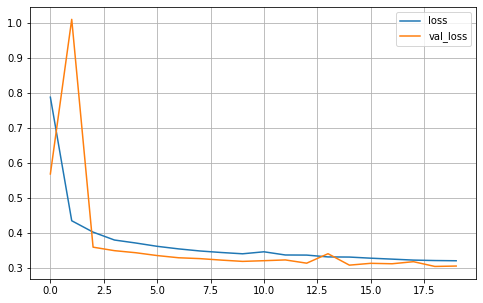

In [10]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [14]:
mse_test=model.evaluate(X_test,y_test)
X_new=(X_train[:3])
y_pred=model.predict(X_new)


5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [16]:
print(mse_test)
print(X_new)
print(y_pred)

0.3167961058459541
[[-0.19397883 -1.07781319 -0.94338545  0.01485314  0.02073335 -0.57291624
   0.92926047 -1.42215523]
 [ 0.75198318 -1.868895    0.40547793 -0.23327682  1.8614649   0.20516532
  -0.91654738  1.09666969]
 [-0.41469108  0.02970134  0.81808819  1.05678372 -0.08786707 -0.29983271
   1.30872858 -1.697027  ]]
[[2.7843444]
 [1.9576914]
 [2.1647785]]


In [24]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
#model = tf.keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 177us/sample - loss: 0.3004 - val_loss: 0.2974
Epoch 2/10
11610/11610 [==============================] - 1s 116us/sample - loss: 0.3001 - val_loss: 0.2979
Epoch 3/10
11610/11610 [==============================] - 1s 117us/sample - loss: 0.2997 - val_loss: 0.3006
Epoch 4/10
11610/11610 [==============================] - 2s 136us/sample - loss: 0.2997 - val_loss: 0.3027
Epoch 5/10
11610/11610 [==============================] - 1s 127us/sample - loss: 0.2997 - val_loss: 0.3015
Epoch 6/10
11610/11610 [==============================] - 1s 116us/sample - loss: 0.2994 - val_loss: 0.3025
Epoch 7/10
11610/11610 [==============================] - 1s 116us/sample - loss: 0.2990 - val_loss: 0.3242
Epoch 8/10
11610/11610 [==============================] - 1s 119us/sample - loss: 0.2991 - val_loss: 0.2941
Epoch 9/10
11610/11610 [==============================] - 1s 126us/sample - loss: 0.298

In [21]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 184us/sample - loss: 0.3028 - val_loss: 0.3039
Epoch 2/100
11610/11610 [==============================] - 1s 124us/sample - loss: 0.3024 - val_loss: 0.2963
Epoch 3/100
11610/11610 [==============================] - 2s 133us/sample - loss: 0.3024 - val_loss: 0.2949
Epoch 4/100
11610/11610 [==============================] - 2s 143us/sample - loss: 0.3021 - val_loss: 0.2950
Epoch 5/100
11610/11610 [==============================] - 2s 138us/sample - loss: 0.3018 - val_loss: 0.2980
Epoch 6/100
11610/11610 [==============================] - 1s 114us/sample - loss: 0.3018 - val_loss: 0.2953
Epoch 7/100
11610/11610 [==============================] - 1s 116us/sample - loss: 0.3016 - val_loss: 0.2954
Epoch 8/100
11610/11610 [==============================] - 1s 123us/sample - loss: 0.3015 - val_loss: 0.2965
Epoch 9/100
11610/11610 [==============================] - 1s 120us/sample - lo

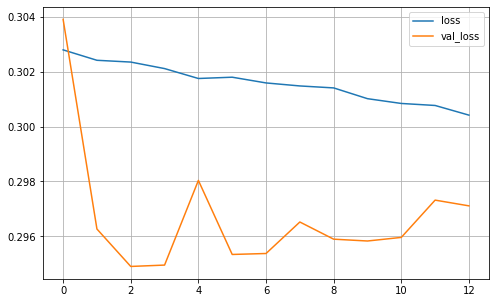

In [22]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
# plt.gca().set_ylim(0, 1)
plt.grid(True)